# 서울시 코로나 현황

In [1]:
import pandas as pd
import numpy as np

In [2]:
covid_raw = pd.read_csv('./data/서울시 코로나19 확진자 현황.csv', sep=',', encoding='euc-kr')[['연번', '확진일', '지역', '여행력', '접촉력', '상태', '이동경로', '노출여부']]
covid_raw

,연번,확진일,지역,여행력,접촉력,상태,이동경로,노출여부
0,8966,11.30.,강북구,NaN,감염경로 조사중,NaN,NaN,Y
1,8965,11.30.,타시도,NaN,기타 확진자 접촉,NaN,NaN,Y
2,8964,11.30.,타시도,NaN,감염경로 조사중,NaN,NaN,Y
3,8963,11.30.,영등포구,NaN,서초구 사우나 관련,NaN,NaN,Y
4,8962,11.30.,영등포구,NaN,감염경로 조사중,NaN,NaN,Y
...,...,...,...,...,...,...,...,...
8961,5,1.31.,성북구,NaN,#5 접촉,퇴원,이동경로 공개기간 경과,Y
8962,4,1.30.,마포구,중국 우한시,해외 접촉,퇴원,이동경로 공개기간 경과,Y
8963,3,1.30.,종로구,NaN,#3 접촉,퇴원,이동경로 공개기간 경과,Y
8964,2,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,이동경로 공개기간 경과,Y


In [3]:
covid_raw['여행력'] = covid_raw['여행력'].fillna('불명 혹은 조사중')
covid_raw['상태'] = covid_raw['상태'].fillna('감염')
covid_raw['이동경로'] = covid_raw['이동경로'].fillna('불명')
covid_raw

,연번,확진일,지역,여행력,접촉력,상태,이동경로,노출여부
0,8966,11.30.,강북구,불명 혹은 조사중,감염경로 조사중,감염,불명,Y
1,8965,11.30.,타시도,불명 혹은 조사중,기타 확진자 접촉,감염,불명,Y
2,8964,11.30.,타시도,불명 혹은 조사중,감염경로 조사중,감염,불명,Y
3,8963,11.30.,영등포구,불명 혹은 조사중,서초구 사우나 관련,감염,불명,Y
4,8962,11.30.,영등포구,불명 혹은 조사중,감염경로 조사중,감염,불명,Y
...,...,...,...,...,...,...,...,...
8961,5,1.31.,성북구,불명 혹은 조사중,#5 접촉,퇴원,이동경로 공개기간 경과,Y
8962,4,1.30.,마포구,중국 우한시,해외 접촉,퇴원,이동경로 공개기간 경과,Y
8963,3,1.30.,종로구,불명 혹은 조사중,#3 접촉,퇴원,이동경로 공개기간 경과,Y
8964,2,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,이동경로 공개기간 경과,Y


In [4]:
region_covid = pd.DataFrame(covid_raw.groupby(by='지역').count()['연번'])
region_covid

,연번
지역,
강남구,520
강동구,277
강북구,200
강서구,604
경기도,1
관악구,547
광진구,186
구로구,277
금천구,125


In [5]:
status_code = []
for i in covid_raw.index:
    if covid_raw['상태'][i] == '감염':
        status_code.append(0)
    elif covid_raw['상태'][i] == '퇴원':
        status_code.append(1)
    else:
        status_code.append(2)
covid_raw['상태코드'] = status_code
covid_raw.tail()

,연번,확진일,지역,여행력,접촉력,상태,이동경로,노출여부,상태코드
8961,5,1.31.,성북구,불명 혹은 조사중,#5 접촉,퇴원,이동경로 공개기간 경과,Y,1
8962,4,1.30.,마포구,중국 우한시,해외 접촉,퇴원,이동경로 공개기간 경과,Y,1
8963,3,1.30.,종로구,불명 혹은 조사중,#3 접촉,퇴원,이동경로 공개기간 경과,Y,1
8964,2,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,이동경로 공개기간 경과,Y,1
8965,1,1.24.,강서구,중국 우한시,해외 접촉,퇴원,이동경로 공개기간 경과,Y,1


In [6]:
regions = sorted(list(covid_raw['지역'].unique()))
region_status = []
for region in regions:
    region_status.append(dict(covid_raw[covid_raw['지역'] == region]['상태코드'].value_counts()))
region_status

[{1: 390, 0: 126, 2: 4},
 {1: 220, 0: 56, 2: 1},
 {1: 165, 0: 35},
 {1: 354, 0: 244, 2: 6},
 {0: 1},
 {1: 484, 0: 57, 2: 6},
 {1: 147, 0: 35, 2: 4},
 {1: 220, 0: 55, 2: 2},
 {1: 100, 0: 23, 2: 2},
 {1: 179, 0: 47, 2: 8},
 {1: 364, 0: 111, 2: 3},
 {1: 245, 0: 70, 2: 4},
 {1: 228, 0: 76, 2: 8},
 {1: 283, 0: 104, 2: 2},
 {1: 203, 0: 87, 2: 3},
 {1: 170, 0: 88, 2: 3},
 {1: 276, 0: 195, 2: 1},
 {1: 167, 0: 53, 2: 3},
 {1: 378, 0: 75, 2: 11},
 {1: 463, 0: 146, 2: 2},
 {1: 208, 0: 107, 2: 1},
 {1: 229, 0: 74, 2: 6},
 {1: 165, 0: 61},
 {1: 293, 0: 63, 2: 5},
 {1: 99, 0: 26, 2: 1},
 {1: 80, 0: 29, 2: 1},
 {1: 216, 0: 75, 2: 2},
 {1: 294, 0: 134, 2: 4}]

In [7]:
for i in range(len(region_status)):
    if len(region_status[i]) == 2:
        region_status[i][2] = 0
    elif len(region_status[i]) == 1:
        region_status[i][1] = 0
        region_status[i][2] = 0
region_status

[{1: 390, 0: 126, 2: 4},
 {1: 220, 0: 56, 2: 1},
 {1: 165, 0: 35, 2: 0},
 {1: 354, 0: 244, 2: 6},
 {0: 1, 1: 0, 2: 0},
 {1: 484, 0: 57, 2: 6},
 {1: 147, 0: 35, 2: 4},
 {1: 220, 0: 55, 2: 2},
 {1: 100, 0: 23, 2: 2},
 {1: 179, 0: 47, 2: 8},
 {1: 364, 0: 111, 2: 3},
 {1: 245, 0: 70, 2: 4},
 {1: 228, 0: 76, 2: 8},
 {1: 283, 0: 104, 2: 2},
 {1: 203, 0: 87, 2: 3},
 {1: 170, 0: 88, 2: 3},
 {1: 276, 0: 195, 2: 1},
 {1: 167, 0: 53, 2: 3},
 {1: 378, 0: 75, 2: 11},
 {1: 463, 0: 146, 2: 2},
 {1: 208, 0: 107, 2: 1},
 {1: 229, 0: 74, 2: 6},
 {1: 165, 0: 61, 2: 0},
 {1: 293, 0: 63, 2: 5},
 {1: 99, 0: 26, 2: 1},
 {1: 80, 0: 29, 2: 1},
 {1: 216, 0: 75, 2: 2},
 {1: 294, 0: 134, 2: 4}]

In [8]:
region_infect = []
region_death = []
region_dischrg = []
for i in range(len(region_status)):
    region_infect.append(region_status[i][0])
    region_dischrg.append(region_status[i][1])
    region_death.append(region_status[i][2])
region_covid['감염'] = region_infect
region_covid['퇴원'] = region_dischrg
region_covid['사망'] = region_death
region_covid.head()

,연번,감염,퇴원,사망
지역,,,,
강남구,520,126,390,4
강동구,277,56,220,1
강북구,200,35,165,0
강서구,604,244,354,6
경기도,1,1,0,0


In [9]:
region_covid.rename(columns={'연번': '확진'}, inplace=True)
region_covid['치명률'] = region_covid['사망'] / region_covid['확진'] * 100
region_covid['완치율'] = region_covid['퇴원'] / region_covid['확진'] * 100
region_covid

,확진,감염,퇴원,사망,치명률,완치율
지역,,,,,,
강남구,520,126,390,4,0.769231,75.000000
강동구,277,56,220,1,0.361011,79.422383
강북구,200,35,165,0,0.000000,82.500000
강서구,604,244,354,6,0.993377,58.609272
경기도,1,1,0,0,0.000000,0.000000
관악구,547,57,484,6,1.096892,88.482633
광진구,186,35,147,4,2.150538,79.032258
구로구,277,55,220,2,0.722022,79.422383
금천구,125,23,100,2,1.600000,80.000000


In [10]:
seoul_covid = region_covid
seoul_covid.drop(['기타', '타시도', '경기도'], inplace=True)
seoul_covid

,확진,감염,퇴원,사망,치명률,완치율
지역,,,,,,
강남구,520,126,390,4,0.769231,75.000000
강동구,277,56,220,1,0.361011,79.422383
강북구,200,35,165,0,0.000000,82.500000
강서구,604,244,354,6,0.993377,58.609272
관악구,547,57,484,6,1.096892,88.482633
광진구,186,35,147,4,2.150538,79.032258
구로구,277,55,220,2,0.722022,79.422383
금천구,125,23,100,2,1.600000,80.000000
노원구,478,111,364,3,0.627615,76.150628


In [11]:
pop = pd.read_csv('../07. Seoul/refined_pop.csv')
pop.rename(columns={'구별': '지역'}, inplace=True)
del pop['Unnamed: 0']
pop = pop.set_index('지역')
pop = pop.sort_index()
pop

,인구수,한국인,외국인,고령자
지역,,,,
강남구,544085,539235,4850,73942
강동구,462275,458058,4217,68798
강북구,313550,309996,3554,62951
강서구,589536,583544,5992,88052
관악구,514555,498574,15981,78206
광진구,361923,348064,13859,50047
구로구,435751,405579,30172,69312
금천구,249641,232157,17484,39361
노원구,529532,525486,4046,84612


In [12]:
seoul_covid['인구수'] = pop['인구수']
seoul_covid['고령자'] = pop['고령자']
seoul_covid['고령비율'] = seoul_covid['고령자'] / seoul_covid['인구수'] * 100
seoul_covid['천명당확진자'] = seoul_covid['확진'] / seoul_covid['인구수'] * 1000
seoul_covid

,확진,감염,퇴원,사망,치명률,완치율,인구수,고령자,고령비율,천명당확진자
지역,,,,,,,,,,
강남구,520,126,390,4,0.769231,75.000000,544085,73942,13.590156,0.955733
강동구,277,56,220,1,0.361011,79.422383,462275,68798,14.882483,0.599210
강북구,200,35,165,0,0.000000,82.500000,313550,62951,20.076862,0.637857
강서구,604,244,354,6,0.993377,58.609272,589536,88052,14.935814,1.024535
관악구,547,57,484,6,1.096892,88.482633,514555,78206,15.198764,1.063054
광진구,186,35,147,4,2.150538,79.032258,361923,50047,13.828079,0.513921
구로구,277,55,220,2,0.722022,79.422383,435751,69312,15.906332,0.635684
금천구,125,23,100,2,1.600000,80.000000,249641,39361,15.767041,0.500719
노원구,478,111,364,3,0.627615,76.150628,529532,84612,15.978638,0.902684


In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

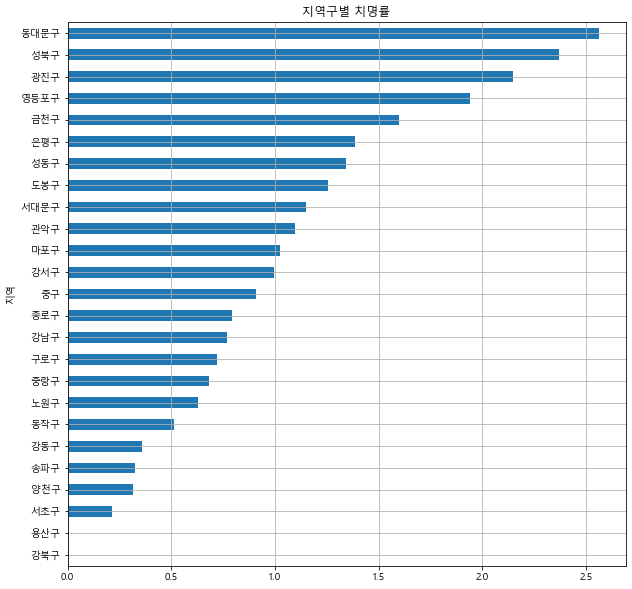

In [14]:
region_covid['치명률'].sort_values().plot(kind='barh', grid=True, figsize=(10, 10))
plt.title('지역구별 치명률')
plt.show()

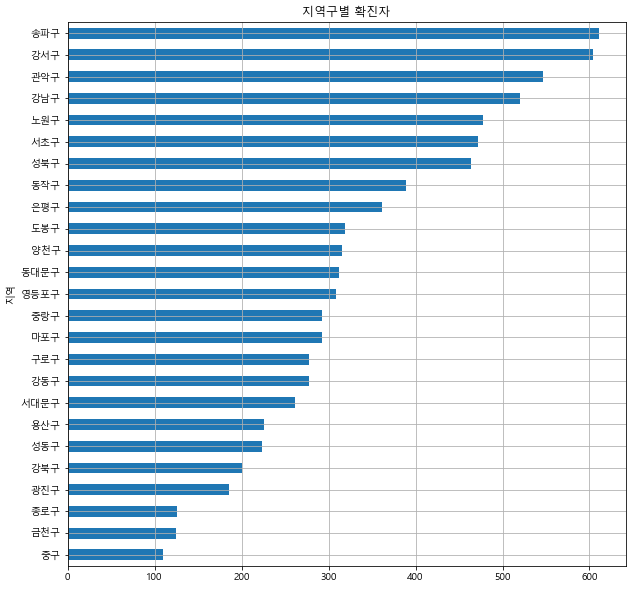

In [15]:
region_covid['확진'].sort_values().plot(kind='barh', grid=True, figsize=(10, 10))
plt.title('지역구별 확진자')
plt.show()

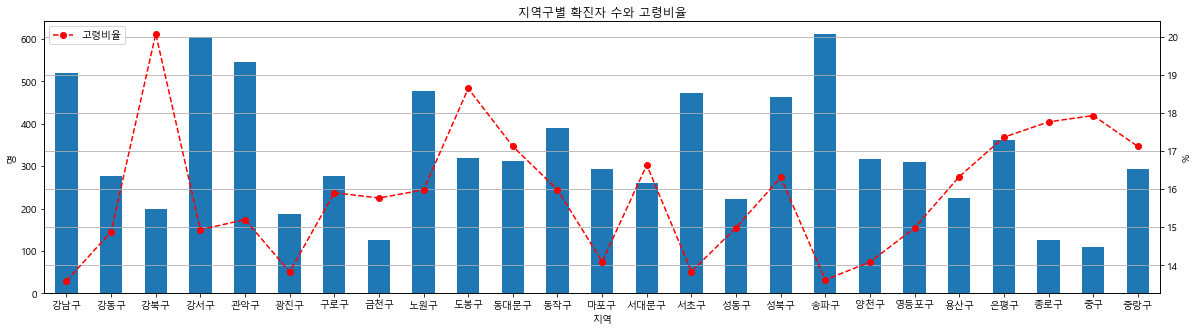

In [16]:
seoul_covid['확진'].plot.bar(rot=0, figsize=(20, 5))
plt.xlabel('지역구')
plt.ylabel('명')
seoul_covid['고령비율'].plot(secondary_y=True, color='r', linestyle='--', marker='o')
plt.grid(True, axis='y')
plt.ylabel('%')
plt.title('지역구별 확진자 수와 고령비율')
plt.legend(loc='upper left')
plt.show()

In [17]:
from sklearn import preprocessing

col = ['확진', '치명률', '인구수', '고령비율']

x = seoul_covid[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
seoul_covid_norm = pd.DataFrame(x_scaled, columns=col, index=seoul_covid.index)
seoul_covid_norm.head()

,확진,치명률,인구수,고령비율
지역,,,,
강남구,0.818363,0.300000,0.755080,0.000000
강동구,0.333333,0.140794,0.603958,0.199227
강북구,0.179641,0.000000,0.329229,1.000000
강서구,0.986028,0.387417,0.839038,0.207449
관악구,0.872255,0.427788,0.700531,0.247985


In [18]:
import seaborn as sns

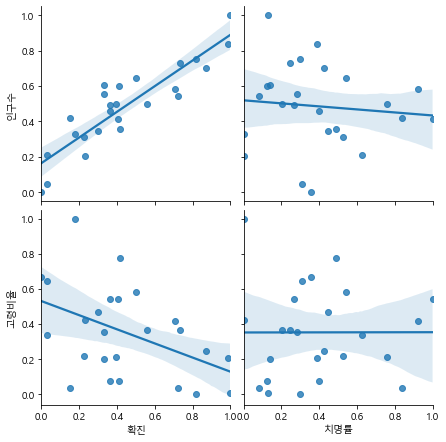

In [19]:
sns.pairplot(seoul_covid_norm, x_vars=['확진', '치명률'], y_vars=['인구수', '고령비율'], kind='reg', size=3)
plt.show()

In [20]:
import folium
import json

In [21]:
geo_path = '../07. Seoul/data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf8'))

In [22]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map.choropleth(geo_data= geo_str, data= seoul_covid_norm['확진'], columns= [seoul_covid_norm.index, seoul_covid_norm['확진']], fill_color='PuRd', key_on= 'feature.id')
title_html = '<h3 align="center" style="font-size:20px"><b>지역구별 확진자</b></h3>'
map.get_root().html.add_child(folium.Element(title_html))
map

In [23]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map.choropleth(geo_data= geo_str, data= seoul_covid['천명당확진자'], columns= [seoul_covid.index, seoul_covid['천명당확진자']], fill_color='PuRd', key_on= 'feature.id')
title_html = '<h3 align="center" style="font-size:20px"><b>지역구별 천명당 확진자</b></h3>'
map.get_root().html.add_child(folium.Element(title_html))
map